<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2021-06-02 02:49:30--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite.3’

m4_survey_data.sqli 100%[===================>]  34.98M  43.0MB/s    in 0.8s    

2021-06-02 02:49:31 (43.0 MB/s) - ‘m4_survey_data.sqlite.3’ saved [36679680/36679680]



Connect to the database.


In [2]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [3]:
import pandas as pd

## Demo: How to run an sql query


In [4]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [5]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


In [6]:
QUERY = """

select count(LanguageDesireNextYear) as Count,LanguageDesireNextYear from LanguageDesireNextYear group by LanguageDesireNextYear order by count(LanguageDesireNextYear) DESC 


"""
df=pd.read_sql_query(QUERY,conn)
df

,Count,LanguageDesireNextYear
0,6630,JavaScript
1,5328,HTML/CSS
2,5239,Python
3,5012,SQL
4,4088,TypeScript
5,3591,C#
6,3097,Bash/Shell/PowerShell
7,2953,Java
8,2759,Go
9,1890,Kotlin


In [7]:
QUERY = """

select count(LanguageWorkedWith) as Count,LanguageWorkedWith from LanguageWorkedWith group by LanguageWorkedWith order by count(LanguageWorkedWith) DESC 


"""
df=pd.read_sql_query(QUERY,conn)
df

,Count,LanguageWorkedWith
0,8687,JavaScript
1,7830,HTML/CSS
2,7106,SQL
3,4642,Bash/Shell/PowerShell
4,4542,Python
5,4506,Java
6,4288,C#
7,3232,TypeScript
8,2913,PHP
9,1946,C++


In [8]:
QUERY = """

select *  from DatabaseWorkedWith  


"""
df=pd.read_sql_query(QUERY,conn)
df2=df.drop_duplicates(subset=['Respondent'],inplace=False,keep=False)
df2['DatabaseWorkedWith'].value_counts()

Microsoft SQL Server    845
MySQL                   474
PostgreSQL              351
SQLite                  192
MongoDB                 170
Oracle                  162
Other(s):                94
Firebase                 90
MariaDB                  44
DynamoDB                 28
Elasticsearch            27
Redis                    20
Cassandra                10
Couchbase                 8
Name: DatabaseWorkedWith, dtype: int64

## Demo: How to run a group by query


In [9]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [10]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0853510810>]],
      dtype=object)

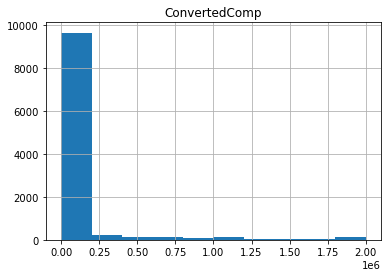

In [11]:
# your code goes here
import matplotlib.pyplot as plt

QUERY = """
SELECT ConvertedComp FROM master

"""

df = pd.read_sql_query(QUERY,conn)
df.hist(column='ConvertedComp')

### Box Plots


Plot a box plot of `Age.`


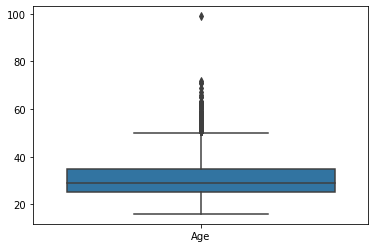

In [12]:
# your code goes here
import seaborn as sns
QUERY = """
SELECT Age FROM master

"""
df = pd.read_sql_query(QUERY,conn)
sns.boxplot(data=df)

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


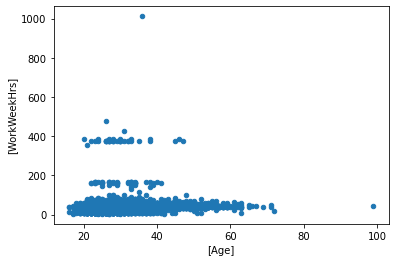

In [13]:
# your code goes here
QUERY = """
SELECT * FROM master

"""
df = pd.read_sql_query(QUERY,conn)
df.plot.scatter(['Age'],['WorkWeekHrs'])

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


Text(0, 0.5, 'WorkWeekHrs')

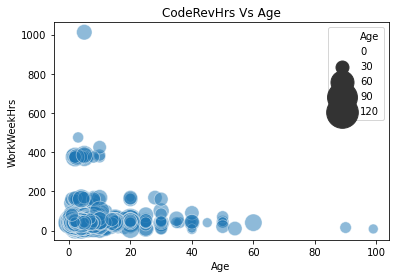

In [14]:
# your code goes here
import matplotlib.pyplot as plt
import numpy as np

QUERY = """
SELECT Age,ConvertedComp,WorkWeekHrs,CodeRevHrs
FROM master

"""
df=pd.read_sql_query(QUERY,conn)
sns.scatterplot(df['CodeRevHrs'], df['WorkWeekHrs'], size=df['Age'], sizes=(0,1000),

                alpha=0.5)
plt.title('CodeRevHrs Vs Age')

plt.xlabel('Age')

plt.ylabel('WorkWeekHrs')

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


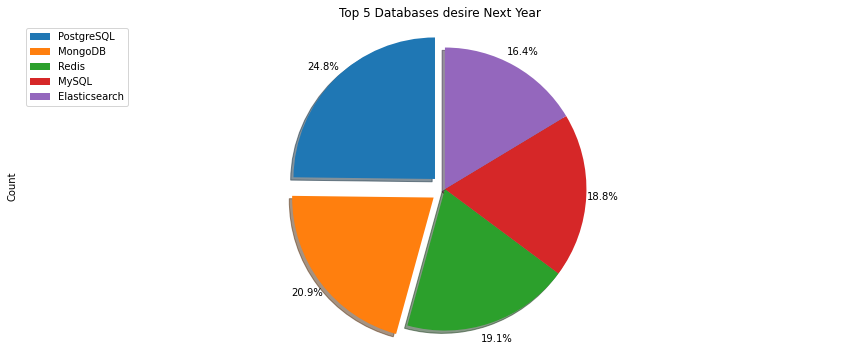

In [15]:
# your code goes here
QUERY = """

select count(DatabaseDesireNextYear) as Count,DatabaseDesireNextYear from DatabaseDesireNextYear group by DatabaseDesireNextYear order by count(DatabaseDesireNextYear) DESC LIMIT 5

"""
df2=pd.read_sql_query(QUERY,conn)
df2.set_index('DatabaseDesireNextYear',inplace=True)

explode=(0.1,0.1,0,0,0)

df2['Count'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,     
                            shadow=True,
                            explode=explode,
                            labels=None,
                            pctdistance=1.12
                            )

plt.title('Top 5 Databases desire Next Year')
plt.axis('equal') # Sets the pie chart to look like a circle.
plt.legend(labels=df2.index, loc='upper left')
plt.show()

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


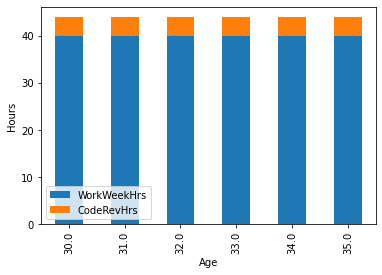

In [16]:
# your code goes here
QUERY="""
Select WorkWeekHrs,CodeRevHrs, Age
From master
where Age between 30 and 35
"""
df_g=pd.read_sql_query(QUERY,conn)
df_med=df_g.groupby(df_g.Age)['WorkWeekHrs','CodeRevHrs'].median()
df_med.plot(kind='bar', stacked=True)
plt.xlabel('Age')
plt.ylabel('Hours')
plt.show()




## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


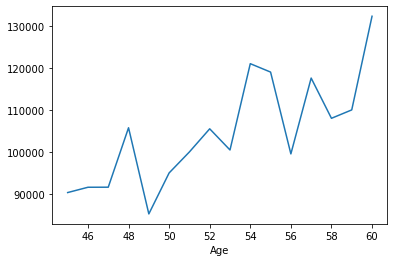

In [17]:
# your code goes here
QUERY="""
Select ConvertedComp,Age
From master
where Age between 45 and 60
"""
df_l=pd.read_sql_query(QUERY,conn)
df5=df_l.groupby(df_l.Age)['ConvertedComp'].median()
df5.plot(kind='line')

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


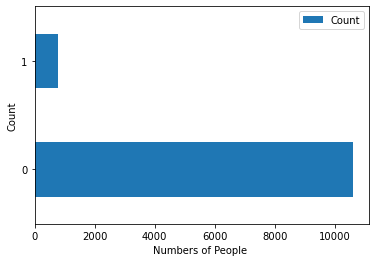

In [18]:
# your code goes here
QUERY="""
Select count(MainBranch) as Count, MainBranch 
From master 
Group by MainBranch
"""
df6=pd.read_sql_query(QUERY,conn)
df6.plot(kind='barh')
plt.ylabel('Count')
plt.xlabel('Numbers of People ')

plt.show()



In [19]:
QUERY="""
Select *
From DevType
"""
df=pd.read_sql_query(QUERY,conn)
df2=df.drop_duplicates(subset=['Respondent'],inplace=False,keep='first')
df2['DevType'].value_counts()


Developer, back-end                              4203
Developer, full-stack                            2029
Database administrator                            995
Data or business analyst                          694
Developer, front-end                              694
Academic researcher                               556
Designer                                          534
Developer, desktop or enterprise applications     450
Data scientist or machine learning specialist     436
Developer, mobile                                 285
DevOps specialist                                  95
Developer, embedded applications or devices        91
Developer, QA or test                              69
Engineer, data                                     43
Engineering manager                                28
Developer, game or graphics                        28
System administrator                               25
Engineer, site reliability                         18
Senior executive/VP         

Close the database connection.


In [20]:
conn.close()


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
